## This notebook benchmarks Li and Zhang 2022 to their supporting spreasdheet)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None
import math

In [2]:
Liq=ss.import_data('PySulfSat_Input.xlsx', sheet_name="Sheet1")
Liq.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,Fe/(Fe+Cu+Ni),S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2
0,51.28,0.89,17.13,7.13,0.0,7.19,10.69,2.58,0.83,0.0,0.0,0.0,0.0,0.0,FeS,10000.0,1250.0,-2.0,-9.243243,0.999559,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN
1,50.99,0.71,16.85,8.51,0.0,7.08,10.35,2.51,0.84,0.0,0.0,0.0,0.0,0.0,Fe90,10000.0,1250.0,-2.0,-9.243243,0.928749,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN
2,49.60,1.11,17.33,6.88,0.0,7.23,10.57,2.53,0.80,0.0,0.0,0.0,0.0,0.0,Fe80,10000.0,1250.0,-2.0,-9.243243,0.788135,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN
3,50.34,1.09,17.29,5.92,0.0,7.21,10.51,2.54,0.80,0.0,0.0,0.0,0.0,0.0,Fe80-24h,10000.0,1250.0,-2.0,-9.243243,0.800000,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN
4,52.68,1.09,16.88,6.95,0.0,7.41,10.52,2.53,0.81,0.0,0.0,0.0,0.0,0.0,Fe80-3h,10000.0,1250.0,-2.0,-9.243243,0.800000,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN


In [3]:
logfo2=Liq['logfO2']
P_kbar=Liq['P(bar)']/1000
T_K=Liq['T(deg C)']+273.15 # the function does the -0.15 correction
FeFeNiCu=Liq['Fe/(Fe+Cu+Ni)']

## Performing calculations the way there were intended, known fo2, known FeFeNiCu
- The parameter T_K_transition=False uses the 1200 C flip between two equations, you can also turn this behavoir off it gets pretty erratic, and choose whether you want 'highT' or 'lowT'

In [5]:
CalcS=ss.calculate_LiZhang2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf=FeFeNiCu, logfo2=logfo2, T_K_transition=True)
CalcS.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
replacing Fe3Fet_Liq in the original dataframe with that input into the function


,SCSS_Tot,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,Fe/(Fe+Cu+Ni),S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2,Fe_FeNiCu_Sulf_calc,lnCHS_NKA_term,NaKAl,DeltaGRT,SumXMAM,lnCs,lnXFeO,LnrFeO,lnaFeS,C1PC2erf,lnS,S2_calc,lnXH2Ot,KOH,XOH,lnXOH,XH2Om,lnXH2Om,lnXOH_XH2O,lnCHScalc,HScal,NaKAlterm,HScal2,Si_cat,Ti_cat,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,1040.393531,51.28,0.89,17.13,7.13,0.0,7.19,10.69,2.58,0.83,0.0,0.0,0.058066,0.0,0.0,FeS,10000.0,1250.0,-2.0,-9.243243,0.999559,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN,0.999559,-inf,-0.132862,7.325,3.889835,-2.829331,2.940882,-0.437634,-0.054707,0.003144,6.947354,1040.393531,-inf,0.886857,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.794513,0.0,0.482251,0.006296,0.189863,0.052819,0.0,0.100800,0.107715,0.047043,0.009958,0.0,0.0,0.003256
1,1029.243979,50.99,0.71,16.85,8.51,0.0,7.08,10.35,2.51,0.84,0.0,0.0,0.056183,0.0,0.0,Fe90,10000.0,1250.0,-2.0,-9.243243,0.928749,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN,0.928749,-inf,-0.131227,7.325,4.125559,-2.593607,2.759577,-0.418206,-0.139328,0.003144,6.936580,1029.243979,-inf,0.887207,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.747155,0.0,0.480665,0.005034,0.187204,0.063319,0.0,0.099495,0.104537,0.045875,0.010102,0.0,0.0,0.003769
2,829.070902,49.60,1.11,17.33,6.88,0.0,7.23,10.57,2.53,0.80,0.0,0.0,0.057885,0.0,0.0,Fe80,10000.0,1250.0,-2.0,-9.243243,0.788135,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN,0.788135,-inf,-0.138555,7.325,3.889167,-2.829999,2.960343,-0.446905,-0.291277,0.003144,6.720306,829.070902,-inf,0.888682,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.959378,0.0,0.473994,0.007979,0.195185,0.051801,0.0,0.103000,0.108228,0.046877,0.009753,0.0,0.0,0.003183
3,802.005890,50.34,1.09,17.29,5.92,0.0,7.21,10.51,2.54,0.80,0.0,0.0,0.058735,0.0,0.0,Fe80-24h,10000.0,1250.0,-2.0,-9.243243,0.800000,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN,0.800000,-inf,-0.138183,7.325,3.686219,-3.032947,3.109617,-0.448910,-0.268788,0.003144,6.687116,802.005890,-inf,0.886915,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.948604,0.0,0.481986,0.007850,0.195107,0.044618,0.0,0.102912,0.107819,0.047152,0.009772,0.0,0.0,0.002784
4,822.749200,52.68,1.09,16.88,6.95,0.0,7.41,10.52,2.53,0.81,0.0,0.0,0.057695,0.0,0.0,Fe80-3h,10000.0,1250.0,-2.0,-9.243243,0.800000,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN,0.800000,-inf,-0.129864,7.325,3.809968,-2.909198,2.976617,-0.407458,-0.275453,0.003144,6.712651,822.749200,-inf,0.885100,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.707705,0.0,0.490214,0.007629,0.185127,0.050965,0.0,0.102794,0.104889,0.045646,0.009616,0.0,0.0,0.003120


### Plotting their result against mine

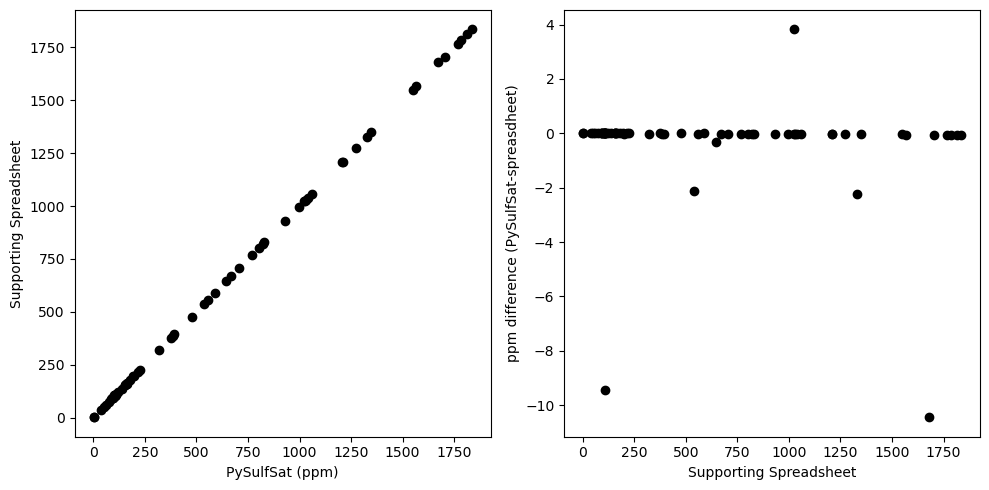

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(CalcS['SCSS_Tot'], Liq['S total cal'], 'ok')
ax2.plot(Liq['S total cal'], CalcS['SCSS_Tot']-Liq['S total cal'],  'ok')
ax1.set_xlabel('PySulfSat (ppm)')
ax1.set_ylabel('Supporting Spreadsheet')
ax2.set_ylabel('ppm difference (PySulfSat-spreasdheet)')
ax2.set_xlabel('Supporting Spreadsheet')
ax2.ticklabel_format(useOffset=False)
fig.tight_layout()

## Using it with specific Fe3Fet_Liq ratio instead
- First we use Thermobar to calculate the logfo2 value to a Fe3FeT ratio, using Kress. Then we input this directly into the function, and show it gives the same result as inputting the logfo2 (phew!)

In [7]:
import Thermobar as pt
Liq['Sample_ID_Liq']='test'
df=pt.convert_fo2_to_fe_partition(liq_comps=Liq, T_K=T_K,
                            P_kbar=P_kbar, fo2=10**logfo2, 
                               model="Kress1991", renorm=True)
df['Fe3Fet_Liq'].head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:4114: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


0    0.057993
1    0.056113
2    0.057812
3    0.058661
4    0.057623
Name: Fe3Fet_Liq, dtype: float64

In [8]:
CalcS_Fe3=ss.calculate_LiZhang2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf=FeFeNiCu, Fe3Fet_Liq=df['Fe3Fet_Liq'])
CalcS_Fe3.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
replacing Fe3Fet_Liq in the original dataframe with that input into the function


,SCSS_Tot,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,Fe/(Fe+Cu+Ni),S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2,Sample_ID_Liq,Fe_FeNiCu_Sulf_calc,lnCHS_NKA_term,NaKAl,DeltaGRT,SumXMAM,lnCs,lnXFeO,LnrFeO,lnaFeS,C1PC2erf,lnS,S2_calc,lnXH2Ot,KOH,XOH,lnXOH,XH2Om,lnXH2Om,lnXOH_XH2O,lnCHScalc,HScal,NaKAlterm,HScal2,Si_cat,Ti_cat,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,1040.430397,51.28,0.89,17.13,7.13,0.0,7.19,10.69,2.58,0.83,0.0,0.0,0.057993,0.0,0.0,FeS,10000.0,1250.0,-2.0,-9.243243,0.999559,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN,test,0.999559,-inf,-0.132862,7.325,3.889941,-2.829225,2.940805,-0.437623,-0.054711,0.003144,6.947390,1040.430397,-inf,0.886857,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.794513,0.0,0.482251,0.006296,0.189863,0.052823,0.0,0.100800,0.107715,0.047043,0.009958,0.0,0.0,0.003252
1,1029.297162,50.99,0.71,16.85,8.51,0.0,7.08,10.35,2.51,0.84,0.0,0.0,0.056113,0.0,0.0,Fe90,10000.0,1250.0,-2.0,-9.243243,0.928749,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN,test,0.928749,-inf,-0.131227,7.325,4.125678,-2.593488,2.759502,-0.418193,-0.139333,0.003144,6.936631,1029.297162,-inf,0.887207,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.747155,0.0,0.480665,0.005034,0.187204,0.063323,0.0,0.099495,0.104537,0.045875,0.010102,0.0,0.0,0.003764
2,829.098298,49.60,1.11,17.33,6.88,0.0,7.23,10.57,2.53,0.80,0.0,0.0,0.057812,0.0,0.0,Fe80,10000.0,1250.0,-2.0,-9.243243,0.788135,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN,test,0.788135,-inf,-0.138555,7.325,3.889271,-2.829895,2.960266,-0.446894,-0.291281,0.003144,6.720339,829.098298,-inf,0.888682,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.959378,0.0,0.473994,0.007979,0.195185,0.051805,0.0,0.103000,0.108228,0.046877,0.009753,0.0,0.0,0.003179
3,802.022088,50.34,1.09,17.29,5.92,0.0,7.21,10.51,2.54,0.80,0.0,0.0,0.058661,0.0,0.0,Fe80-24h,10000.0,1250.0,-2.0,-9.243243,0.800000,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN,test,0.800000,-inf,-0.138183,7.325,3.686311,-3.032855,3.109539,-0.448900,-0.268791,0.003144,6.687136,802.022088,-inf,0.886915,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.948604,0.0,0.481986,0.007850,0.195107,0.044622,0.0,0.102912,0.107819,0.047152,0.009772,0.0,0.0,0.002781
4,822.775352,52.68,1.09,16.88,6.95,0.0,7.41,10.52,2.53,0.81,0.0,0.0,0.057623,0.0,0.0,Fe80-3h,10000.0,1250.0,-2.0,-9.243243,0.800000,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN,test,0.800000,-inf,-0.129864,7.325,3.810070,-2.909096,2.976540,-0.407447,-0.275457,0.003144,6.712683,822.775352,-inf,0.885100,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.707705,0.0,0.490214,0.007629,0.185127,0.050969,0.0,0.102794,0.104889,0.045646,0.009616,0.0,0.0,0.003117


Text(0, 0.5, 'SCSS calc using logfo2')

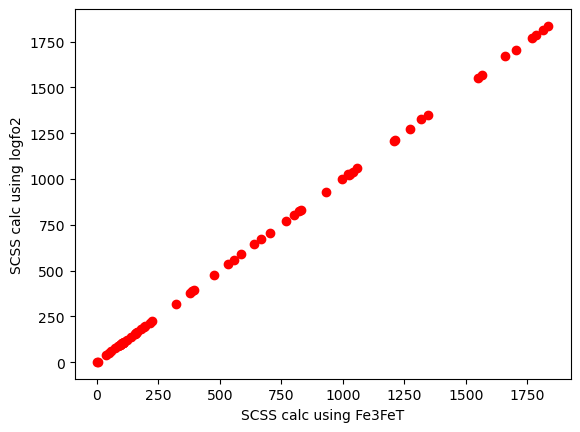

In [9]:
plt.plot(CalcS_Fe3['SCSS_Tot'], CalcS['SCSS_Tot'], 'or')
plt.xlabel('SCSS calc using Fe3FeT')
plt.ylabel('SCSS calc using logfo2')

## Using it with Oneill sulfide composition

In [10]:
Ni_Liq=Liq['logfO2']*0+500
Cu_Liq=Liq['logfO2']*0+100

CalcS_Oneill=ss.calculate_LiZhang2022_SCSS(df=Liq, T_K=T_K, P_kbar=P_kbar, 
 Fe_FeNiCu_Sulf="Calc_ONeill", logfo2=logfo2, Ni_Liq=Ni_Liq, Cu_Liq=Cu_Liq)

replacing Fe3Fet_Liq in the original dataframe with that input into the function


In [11]:
Ni_Liq=Liq['logfO2']*0+500
Cu_Liq=Liq['logfO2']*0+100

CalcS_Smythe=ss.calculate_LiZhang2022_SCSS(df=Liq, T_K=T_K, 
P_kbar=P_kbar, Fe_FeNiCu_Sulf="Calc_Smythe", 
logfo2=logfo2, Ni_Liq=Ni_Liq, Cu_Liq=Cu_Liq)
CalcS_Smythe.head()

replacing Fe3Fet_Liq in the original dataframe with that input into the function


,SCSS_Tot,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample No.,P(bar),T(deg C),ΔFMQ,logfO2,Fe/(Fe+Cu+Ni),S total cal,ln(XFe2O3/XFeO),FeO,Fe2O3,delt G/RT,∑XM*AM,lnCs,-lnXFeO,-lnrFeO,lnaFeS,(C1P+C2erf(P))/T,Unnamed: 28,ln [S],S2- cal,Unnamed: 31,XH2Ot,lnXH2Ot,K(OH),XOH,lnXOH,XH2Om,lnXH2Om,ln(XOH+XH2O),Unnamed: 40,1/T,lnCHS cal,HS cal,Unnamed: 44,Na+K-Al term,lnCHS cal+NKA term,HS cal2,Sample_ID_Liq,Ni_Sulf_Calc,Cu_Sulf_Calc,Fe_Sulf_Calc,O_Sulf_Calc,S_Sulf_Calc,Fe_FeNiCu_Sulf_calc,lnCHS_NKA_term,NaKAl,DeltaGRT,SumXMAM,lnCs,lnXFeO,LnrFeO,lnaFeS,C1PC2erf,lnS,S2_calc,lnXH2Ot,KOH,XOH,lnXOH,XH2Om,lnXH2Om,lnXOH_XH2O,lnCHScalc,HScal,NaKAlterm,HScal2,Si_cat,Ti_cat,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,303.779107,51.28,0.89,17.13,7.13,0.0,7.19,10.69,2.58,0.83,0.0,0.0,0.058066,0.0,0.0,FeS,10000.0,1250.0,-2.0,-9.243243,0.999559,1040.411979,-3.479508,0.060258,0.001857,7.325,3.889870,-2.829296,2.940856,-0.437624,-0.054708,0.003144,NaN,6.947372,1040.411979,NaN,0.0,NaN,0.886857,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.794780,NaN,NaN,test,30.0,19.554814,18.847122,0.539552,31.058512,0.291856,-inf,-0.132862,7.325,3.889835,-2.829331,2.940882,-0.437634,-1.285760,0.003144,5.716301,303.779107,-inf,0.886857,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.794513,0.0,0.482251,0.006296,0.189863,0.052819,0.0,0.100800,0.107715,0.047043,0.009958,0.0,0.0,0.003256
1,381.620491,50.99,0.71,16.85,8.51,0.0,7.08,10.35,2.51,0.84,0.0,0.0,0.056183,0.0,0.0,Fe90,10000.0,1250.0,-2.0,-9.243243,0.928749,1029.266333,-3.514465,0.072085,0.002146,7.325,4.125599,-2.593567,2.759551,-0.418196,-0.139330,0.003144,NaN,6.936602,1029.266333,NaN,0.0,NaN,0.887207,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.747418,NaN,NaN,test,30.0,15.489749,22.142050,0.635192,31.733009,0.344359,-inf,-0.131227,7.325,4.125559,-2.593607,2.759577,-0.418206,-1.131482,0.003144,5.944427,381.620491,-inf,0.887207,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.747155,0.0,0.480665,0.005034,0.187204,0.063319,0.0,0.099495,0.104537,0.045875,0.010102,0.0,0.0,0.003769
2,295.849381,49.60,1.11,17.33,6.88,0.0,7.23,10.57,2.53,0.80,0.0,0.0,0.057885,0.0,0.0,Fe80,10000.0,1250.0,-2.0,-9.243243,0.788135,829.086253,-3.482819,0.059264,0.001821,7.325,3.889202,-2.829965,2.960316,-0.446893,-0.291279,0.003144,NaN,6.720324,829.086253,NaN,0.0,NaN,0.888682,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.959659,NaN,NaN,test,30.0,20.381959,18.177906,0.522010,30.918126,0.281242,-inf,-0.138555,7.325,3.889167,-2.829999,2.960343,-0.446905,-1.321732,0.003144,5.689850,295.849381,-inf,0.888682,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.959378,0.0,0.473994,0.007979,0.195185,0.051801,0.0,0.103000,0.108228,0.046877,0.009753,0.0,0.0,0.003183
3,239.321418,50.34,1.09,17.29,5.92,0.0,7.21,10.51,2.54,0.80,0.0,0.0,0.058735,0.0,0.0,Fe80-24h,10000.0,1250.0,-2.0,-9.243243,0.800000,802.017741,-3.467341,0.051053,0.001593,7.325,3.686250,-3.032916,3.109590,-0.448898,-0.268789,0.003144,NaN,6.687131,802.017741,NaN,0.0,NaN,0.886915,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.948885,NaN,NaN,test,30.0,23.711607,15.485549,0.453836,30.349008,0.238723,-inf,-0.138183,7.325,3.686219,-3.032947,3.109617,-0.448910,-1.478096,0.003144,5.477807,239.321418,-inf,0.886915,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.948604,0.0,0.481986,0.007850,0.195107,0.044618,0.0,0.102912,0.107819,0.047152,0.009772,0.0,0.0,0.002784
4,292.323106,52.68,1.09,16.88,6.95,0.0,7.41,10.52,2.53,0.81,0.0,0.0,0.057695,0.0,0.0,Fe80-3h,10000.0,1250.0,-2.0,-9.243243,0.800000,822.763945,-3.486304,0.057929,0.001773,7.325,3.810002,-2.909164,2.976590,-0.407446,-0.275455,0.003144,NaN,6.712669,822.763945,NaN,0.0,NaN,0.885100,0.0,NaN,0.0,NaN,NaN,NaN,0.000657,NaN,NaN,NaN,-2.707963,NaN,NaN,test,30.0,20.148103,18.367085,0.526929,30.957882,0.284240,-inf,-0.129864,7.325,3.809968,-2.909198,2.976617,-0.407458,-1.310245,0.003144,5.677860,292.323106,-inf,0.885100,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.707705,0.0,0.490214,0.007629,0.18

## Changing H2O
- Matters for a subset of compositoins

In [12]:
Liq_H2O_5=Liq.copy()
Liq_H2O_5['H2O_Liq']=5
CalcS_H2O_5=ss.calculate_LiZhang2022_SCSS(df=Liq_H2O_5,
T_K=T_K, P_kbar=P_kbar,  Fe_FeNiCu_Sulf=FeFeNiCu, logfo2=logfo2)


Liq_H2O_10=Liq.copy()
Liq_H2O_10['H2O_Liq']=10
CalcS_H2O_10=ss.calculate_LiZhang2022_SCSS(df=Liq_H2O_10,
T_K=T_K, P_kbar=P_kbar,  Fe_FeNiCu_Sulf=FeFeNiCu, logfo2=logfo2)


Using inputted Fe_FeNiCu_Sulf ratio for calculations.
replacing Fe3Fet_Liq in the original dataframe with that input into the function
Using inputted Fe_FeNiCu_Sulf ratio for calculations.
replacing Fe3Fet_Liq in the original dataframe with that input into the function


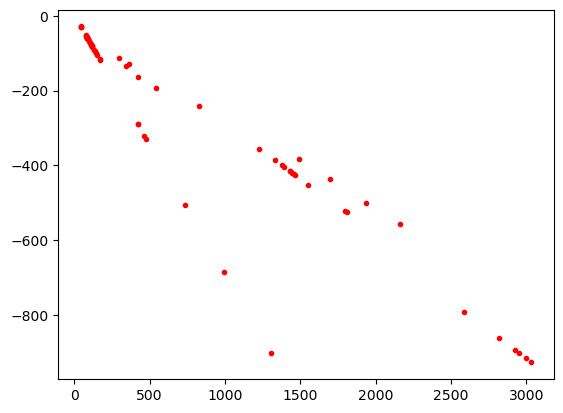

In [13]:
plt.plot(CalcS_H2O_5['SCSS_Tot'], 
         CalcS_H2O_5['SCSS_Tot']-CalcS_H2O_10['SCSS_Tot'], '.r')